# Charger et inspecter Data.csv

## importation 

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



## Charger et inspecter Data.csv

In [8]:
absolute_path = "data.csv"
df_abs = pd.read_csv(absolute_path)

print(df_abs.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Étudier les valeurs manquantes et Corrélations

In [7]:
# Voir les valeurs manquantes
print(df_abs.isnull().sum().sum())

0


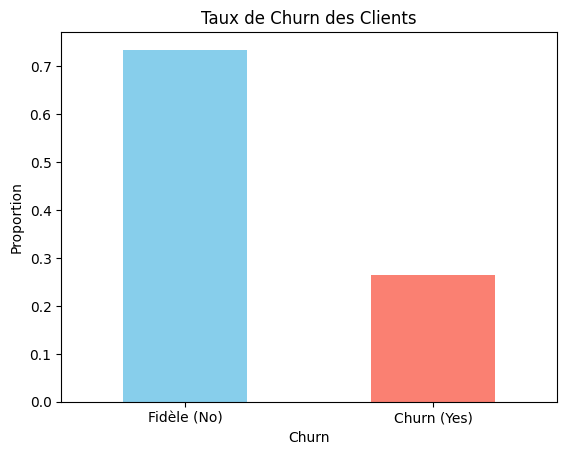

In [20]:
churn_rate = df_abs['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Taux de Churn des Clients')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['Fidèle (No)', 'Churn (Yes)'], rotation=0)
plt.show()